In [1]:
import pandas as pd
dep_score = pd.read_csv('D2_DRIVE_gene_dep_scores.csv')
# first we need to split the names out!
dep_score['Symbol'] = dep_score['Unnamed: 0'].str.split(' ', expand = True)[0]

In [2]:
dep_score.drop('Unnamed: 0', inplace = True, axis = 1)
dep_score.set_index('Symbol', inplace = True)

In [3]:
dep_score.head()

,127399_SOFT_TISSUE,1321N1_CENTRAL_NERVOUS_SYSTEM,2313287_STOMACH,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,769P_KIDNEY,786O_KIDNEY,8305C_THYROID,8505C_THYROID,921_UVEA,A101D_SKIN,...,UMUC3_URINARY_TRACT,VMRCRCW_KIDNEY,WM115_SKIN,WM1799_SKIN,WM2664_SKIN,WM793_SKIN,WM88_SKIN,WSUDLCL2_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,YD38_UPPER_AERODIGESTIVE_TRACT,YMB1_BREAST
Symbol,,,,,,,,,,,,,,,,,,,,,
CDH2,-0.089352,-0.002663,-0.137925,0.173165,-0.134545,-0.148781,-0.203150,-0.037625,-0.175778,0.139467,...,-0.066021,0.107229,-0.227427,-0.032107,-0.218693,-0.013857,NaN,-0.230569,0.021516,-0.106172
AKT3,-0.131082,0.065231,0.087221,-0.411486,0.177895,0.324306,0.040381,0.022989,-0.360923,-0.094837,...,-0.035967,-0.031698,0.221841,0.207119,-0.175644,-0.063389,NaN,0.519001,-0.029192,-0.097869
POU5F1P5,-0.212644,-0.547079,-0.159532,-0.277817,0.179144,0.084569,-0.179724,0.000420,-0.091683,0.439111,...,0.106033,0.060357,0.137065,0.072449,0.274616,0.032009,NaN,-0.080685,-0.042488,-0.334812
MED6,-0.225475,-0.477512,-0.314678,-0.192239,-0.359350,-0.705736,-0.346217,-0.355164,-0.510637,-0.244747,...,-0.249799,-0.773315,-0.403044,-0.241388,-0.154820,-0.564204,-0.267406,-0.231379,-0.775019,-0.254618
NR2E3,-0.096706,-0.123476,-0.138421,-0.873816,-0.043431,-0.200512,-0.181933,-0.192233,0.064916,0.163630,...,-0.205856,0.024931,0.276181,0.093556,-0.119268,0.046175,0.406302,-0.750619,-0.256513,-0.376421


In [5]:
hepg2 = dep_score[['HEPG2_LIVER']]

In [6]:
hepg2.head()

,HEPG2_LIVER
Symbol,
CDH2,0.057906
AKT3,-0.269006
POU5F1P5,-0.040908
MED6,-0.346157
NR2E3,-0.200507


<AxesSubplot:ylabel='Frequency'>

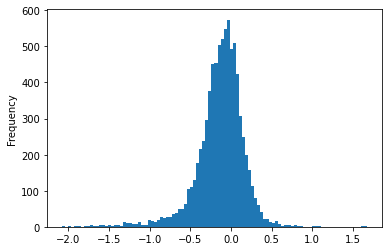

In [7]:
hepg2['HEPG2_LIVER'].plot(kind = 'hist', bins = 100)

In [8]:
# hepg2 targets
hepg2.loc[hepg2['HEPG2_LIVER']<-1]

,HEPG2_LIVER
Symbol,
DCAF13P3,-1.215912
SMC4,-1.194541
ATP6V1G2-DDX39B,-1.169049
ALYREF,-1.720766
SF3B4,-1.342586
...,...
COPB2,-1.587966
ZRANB2,-1.008620
CKAP5,-1.242999


In [9]:
targets = hepg2.loc[hepg2['HEPG2_LIVER']<-1].index

In [10]:
targets

Index(['DCAF13P3', 'SMC4', 'ATP6V1G2-DDX39B', 'ALYREF', 'SF3B4',
       'U2AF1L5&U2AF1', 'SF3A1', 'RACK1', 'PPIE', 'TACC3',
       ...
       'CCNK', 'BUD31', 'RPL14', 'PRPF4', 'PRPF3', 'COPB2', 'ZRANB2', 'CKAP5',
       'CDK11B', 'RBX1'],
      dtype='object', name='Symbol', length=139)

In [11]:
rbp = pd.read_excel('mmc2.xlsx', sheet_name = 'CandidateRBDpep')
rbp_targets = [t for t in targets if t in rbp['Symbol'].dropna().tolist()]

In [12]:
rbp_targets

['ALYREF',
 'SF3B4',
 'SF3A1',
 'NXF1',
 'CCT7',
 'CCT2',
 'TBL3',
 'WDR3',
 'RPL35',
 'U2AF2',
 'CTNNB1',
 'DHX8',
 'DHX15',
 'DYNC1I2',
 'EEF2',
 'PUF60',
 'SNRNP200',
 'SF3B1',
 'XRCC6',
 'GEMIN5',
 'HNRNPC',
 'HNRNPU',
 'HSPE1',
 'NACA',
 'PABPC3',
 'POLR2A',
 'RBM22',
 'PSMC2',
 'RAN',
 'ABCE1',
 'RPA1',
 'RPL7',
 'RPS27A',
 'SNRPF',
 'CCT3',
 'CDK11A',
 'VCP',
 'XRCC5',
 'WDR75',
 'UTP15',
 'RUVBL1',
 'EIF3A',
 'EIF3G',
 'EIF3H',
 'EIF3I',
 'RPL14',
 'PRPF3']

# Are they selective?
- if it kills all the cells, then all the cells will have low score in that gene
- if it is selective, the distribution might be more bimodal

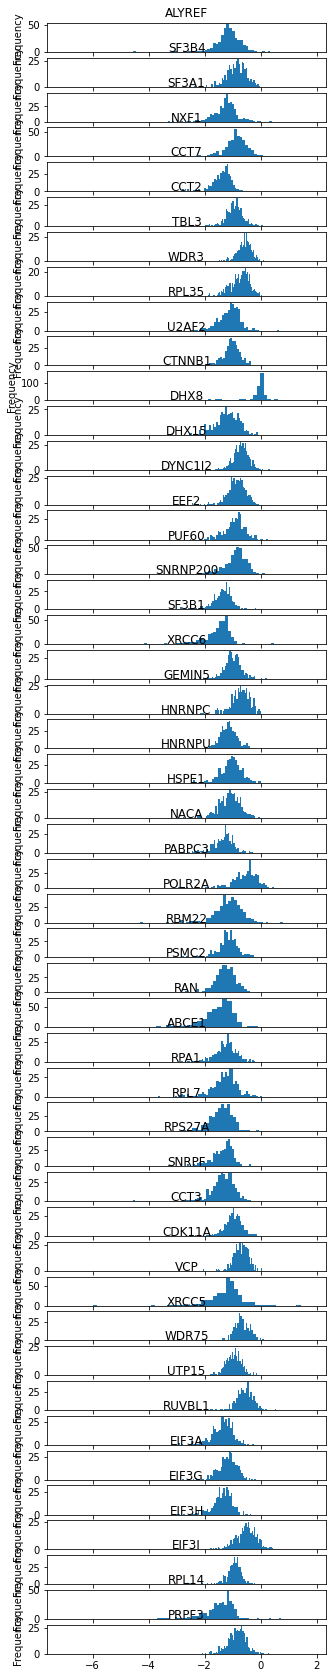

In [13]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(len(rbp_targets), 1, figsize = (5,30), sharex = True)
for i, rbp in enumerate(rbp_targets):
    dep_score.loc[rbp].plot.hist(bins = 50, ax = ax[i])
    ax[i].set_title(rbp)